# Migraine Data Analysis
This project has been created in order to clean and analyse the characteristics and values of the dataset for the development of a Machiene Learning model with the implementation of APIs such as the  WeatherApi. 

With the detailed analysis and key information retrieval of the dataset at hand, and after further medical investigation we will gain a better understanding of the complications, and the real characteristics and struggles of this deasease. The purpose of this program (as a set of projects) is to address the seriousness of this common health issue highlighting the importance of medical researches and the development of medical services and solutions offered to those with severe considitons of migraine.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning and preprocessing imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency


In [2]:
# Loading the dataset for accessing content
file_path= "C://Users//nyolc//Downloads//migraine_data.csv"
migraine_data = pd.read_csv(file_path)
# Displaying basic information
print(f"Dataset shape: {migraine_data.shape}")
migraine_data.head()

Dataset shape: (400, 24)


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [3]:
migraine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [4]:
migraine_data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [5]:
missing_values = migraine_data.isnull().sum()
print(missing_values[missing_values>0] if missing_values.sum()>0 else "No missing values found in the dataset")

No missing values found in the dataset


In [6]:
# checking the distribution of the different migraine types present in the dataset
type_counts = migraine_data['Type'].value_counts()
print("Migraine type distribution:")
print(type_counts)

Migraine type distribution:
Type
Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64


In [7]:
def detect_outliers(df, column):
    Q1 =df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column]< lower_bound) | (df[column] > upper_bound)] 
    return outliers, lower_bound, upper_bound
numeric_columns =['Age', 'Duration', 'Frequency', 'Intensity']
for column in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers(migraine_data, column)
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Bounds: [{lower_bound}, {upper_bound}]")
    if len(outliers) > 0:
        print(outliers[[column, 'Type']].head(5))
    print("\n")
duplicates = migraine_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
if duplicates.sum()>0:
    print("Duplicate rows:")
    print(migraine_data[duplicates])
migraine_data_clean = migraine_data.drop_duplicates().reset_index(drop=True)
print(f"Shape after removing duplicates: {migraine_data_clean.shape}")

Outliers in Age:
Number of outliers: 4
Bounds: [-5.0, 67.0]
     Age                        Type
35    68       Migraine without aura
60    70       Migraine without aura
67    69  Typical aura with migraine
123   77  Typical aura with migraine


Outliers in Duration:
Number of outliers: 0
Bounds: [-0.5, 3.5]


Outliers in Frequency:
Number of outliers: 0
Bounds: [-3.5, 8.5]


Outliers in Intensity:
Number of outliers: 20
Bounds: [0.5, 4.5]
     Intensity                           Type
274          0  Typical aura without migraine
352          0  Typical aura without migraine
353          0  Typical aura without migraine
354          0  Typical aura without migraine
355          0  Typical aura without migraine


Number of duplicate rows: 6
Duplicate rows:
     Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
94    28         1          5         1          1          2       1      0   
118   28         1          5         1          1          2       1    

# Feature Analysis
- Aura Score
- Severity index
  - weighted combination of duration, frequency and intensity
- Vestibular symptoms
  - combining hypoacusis, vertigo, and tinnitus
- Sensory Sensitivity
- Binary indicator for aura presence in migraine episodes
- Age groups represented
- Symptom count

In [8]:
migraine_data_eng = migraine_data_clean.copy()
migraine_data_eng['aura_score'] = migraine_data_eng['Visual'] + \
                                migraine_data_eng['Sensory'] + \
                                migraine_data_eng['Dysphasia']
migraine_data_eng['severity_index'] = (migraine_data_eng['Intensity'] *3 +
                                   migraine_data_eng['Tinnitus'] * 2 +
                                    migraine_data_eng['Frequency']) / 6
migraine_data_eng['vestibular_symptoms']= (migraine_data_eng['Vertigo'] + 
                                        migraine_data_eng['Tinnitus'] +
                                        migraine_data_eng['Hypoacusis'])
migraine_data_eng['motor_symptoms'] = (migraine_data_eng['Paresthesia'] + 
                                    migraine_data_eng['Ataxia'] + 
                                    migraine_data_eng['Defect'])
migraine_data_eng['gi_symptoms'] = migraine_data_eng['Nausea'] + migraine_data_eng['Vomit']

migraine_data_eng['sensory_sensitivity'] = migraine_data_eng['Phonophobia'] + migraine_data_eng['Photophobia']

migraine_data_eng['has_aura'] = ((migraine_data_eng['Visual'] > 0) | 
                                (migraine_data_eng['Sensory'] > 0) | 
                                (migraine_data_eng['Dysphasia'] > 0)).astype(int)

bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '>60']
migraine_data_eng['age_group'] = pd.cut(migraine_data_eng['Age'], bins=bins, labels=labels)

symptom_cols = ['Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 
                'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 
                'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia']

migraine_data_eng['symptom_count'] = migraine_data_eng[symptom_cols].applymap(lambda x: 1 if x > 0 else 0).sum(axis=1)

engineered_features = ['aura_score', 'severity_index', 'vestibular_symptoms', 'motor_symptoms', 
                       'gi_symptoms', 'sensory_sensitivity', 'has_aura', 'symptom_count']

migraine_data_eng[engineered_features].describe()

C:\Users\nyolc\AppData\Local\Temp\ipykernel_10744\2179027168.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  migraine_data_eng['symptom_count'] = migraine_data_eng[symptom_cols].applymap(lambda x: 1 if x > 0 else 0).sum(axis=1)


,aura_score,severity_index,vestibular_symptoms,motor_symptoms,gi_symptoms,sensory_sensitivity,has_aura,symptom_count
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.827411,1.650592,0.203046,0.022843,1.312183,1.956853,0.835025,4.576142
std,1.231751,0.490533,0.523631,0.165731,0.490629,0.268188,0.371630,1.070321
min,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.333333,0.000000,0.000000,1.000000,2.000000,1.000000,4.000000
50%,2.000000,1.666667,0.000000,0.000000,1.000000,2.000000,1.000000,4.000000
75%,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,5.000000
max,6.000000,2.833333,3.000000,2.000000,2.000000,2.000000,1.000000,9.000000


# Data Visulazitation To Understand Patterns and Study Correlations

## Studying the representation of age groups in different migraine types

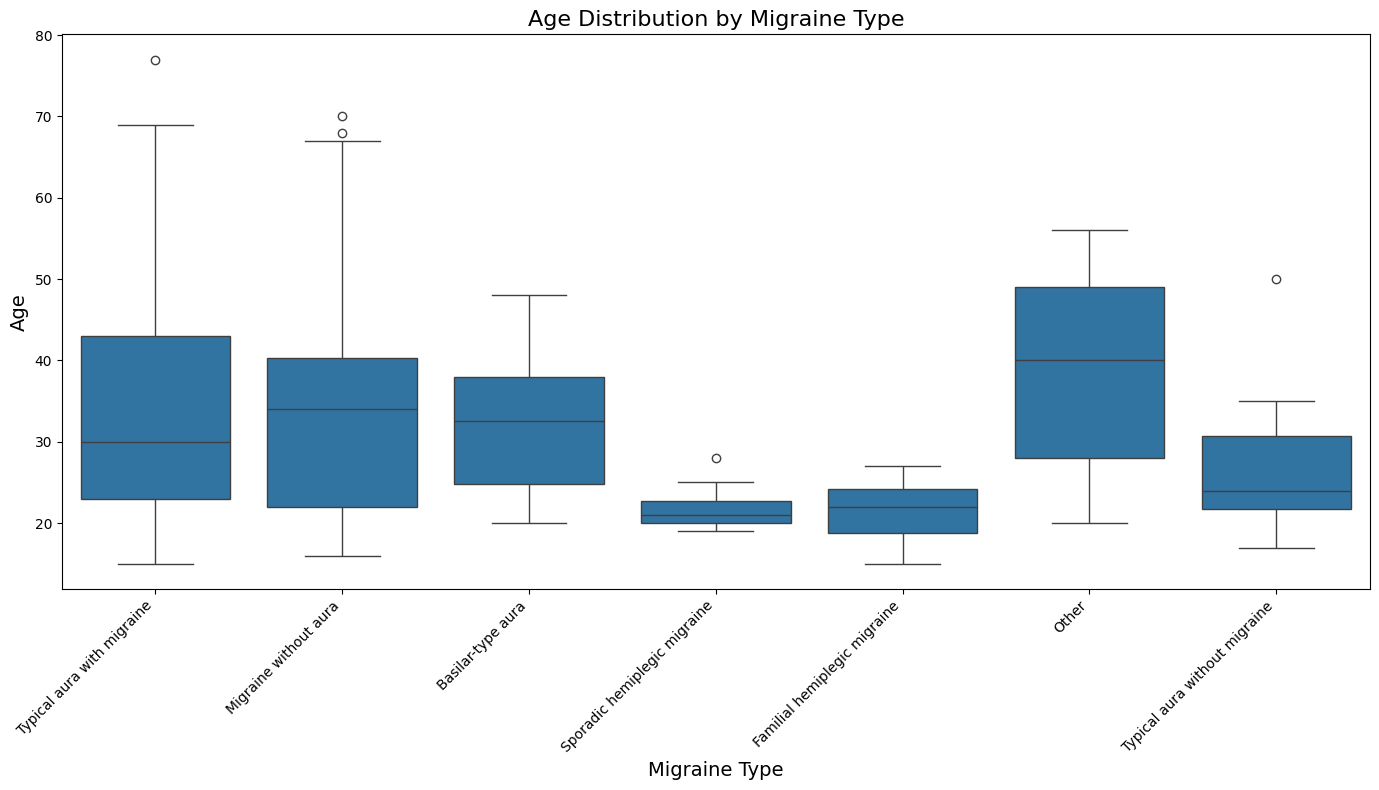

In [9]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Type', y='Age', data=migraine_data_eng)
plt.title('Age Distribution by Migraine Type', fontsize=16)
plt.xlabel('Migraine Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

age_group_counts = pd.crosstab(migraine_data_eng['Type'], migraine_data_eng['age_group'])
age_group_percentages = age_group_counts.div(age_group_counts.sum(axis=1), axis=0) * 100




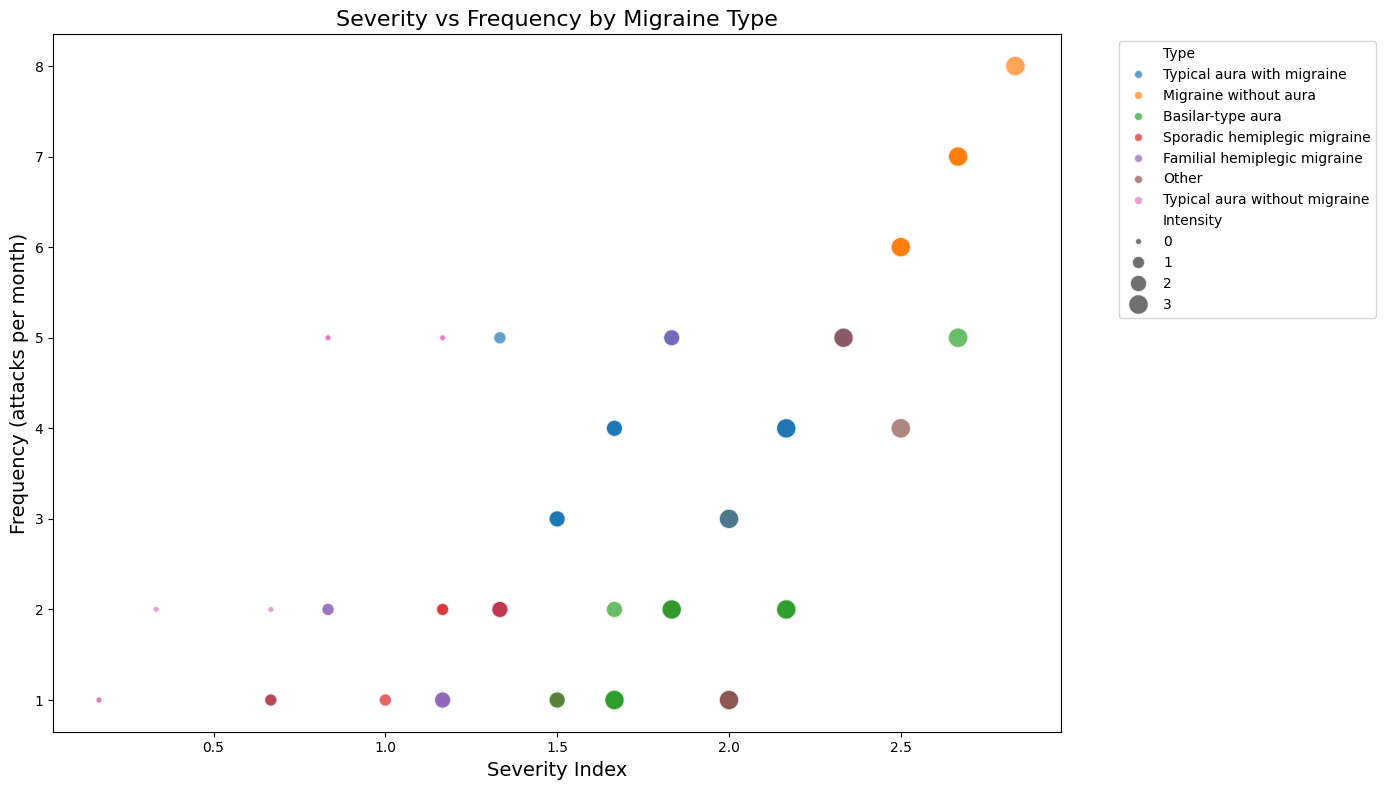

In [10]:
# Severity vs Frequency by migraine type
plt.figure(figsize=(14, 8))
sns.scatterplot(x='severity_index', y='Frequency', hue='Type', size='Intensity',
                sizes=(20, 200), data=migraine_data_eng, alpha=0.7)
plt.title('Severity vs Frequency by Migraine Type', fontsize=16)
plt.xlabel('Severity Index', fontsize=14)
plt.ylabel('Frequency (attacks per month)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


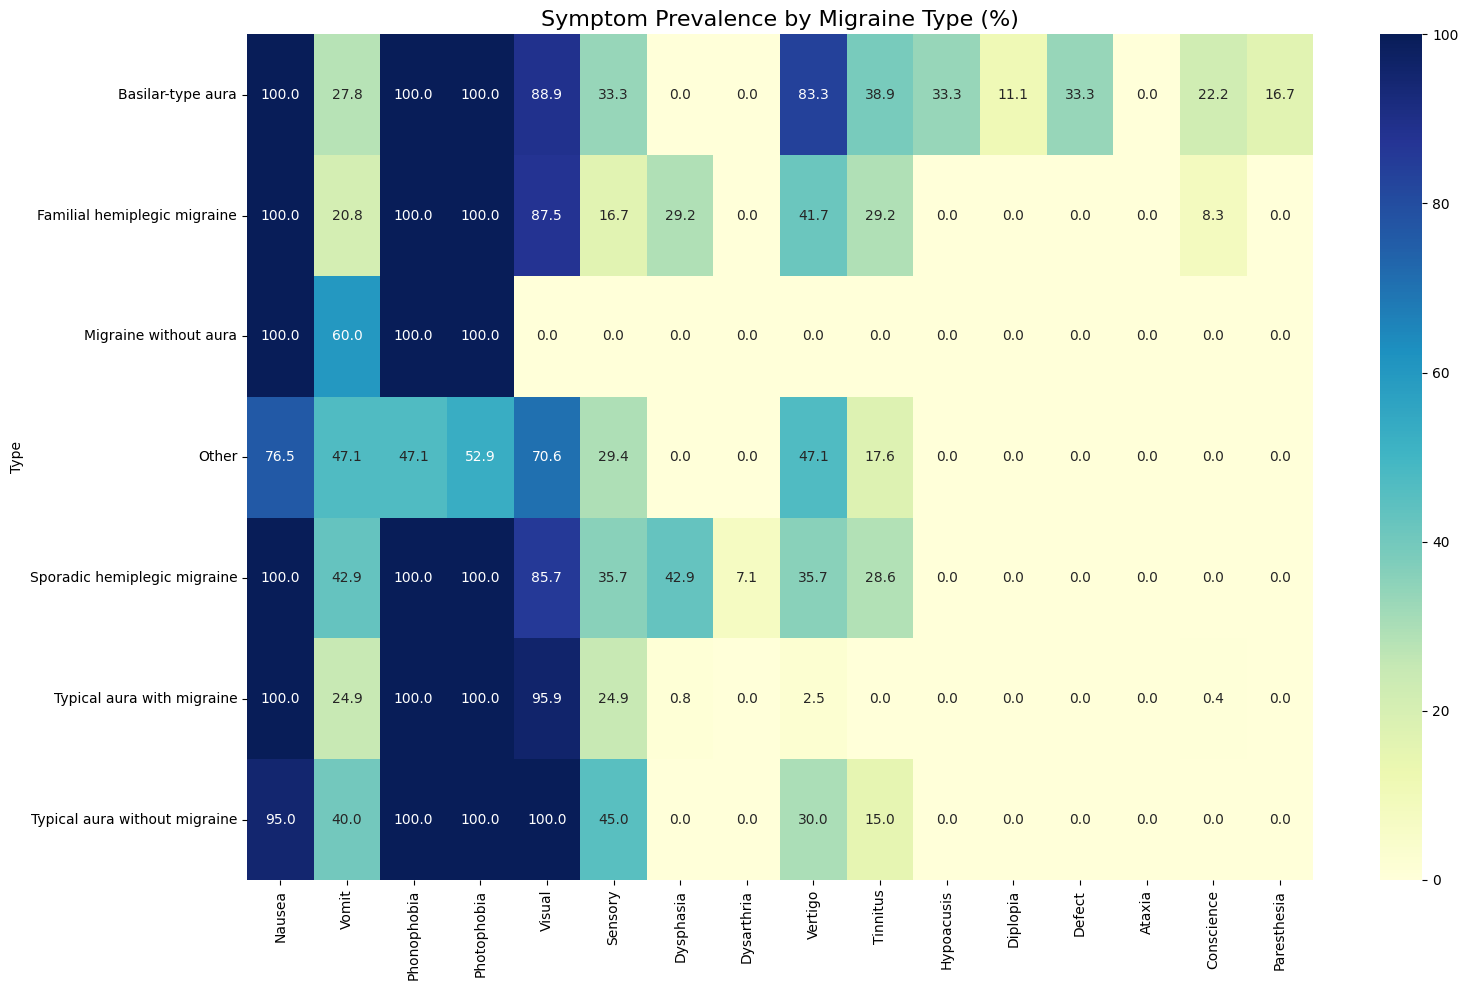

In [11]:
symptom_prevalence = pd.DataFrame()

for symptom in symptom_cols:
    # Presence/Absence in binary representation
    binary_symptom = migraine_data_eng[symptom].apply(lambda x: 1 if x > 0 else 0)
    #  prevalence by type
    prevalence = binary_symptom.groupby(migraine_data_eng['Type']).mean() * 100
    symptom_prevalence[symptom] = prevalence

# HEatmap for visualization
plt.figure(figsize=(16, 10))
sns.heatmap(symptom_prevalence, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Symptom Prevalence by Migraine Type (%)', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# Prepare features and target
# Exclude non-numeric columns and the target
X = migraine_data_eng.drop(['Type', 'age_group'], axis=1)
y = migraine_data_eng['Type']
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

label_encoder = LabelEncoder()
scaler = StandardScaler()

# Encoding target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#SMOTE to handle class imbalances in the cases where it is needed for understanding and cleaning the data properly
imbalance_ratio = pd.Series(y_train).value_counts().max() / pd.Series(y_train).value_counts().min()
print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 3:
    print("Applying SMOTE to balance classes...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_scaled, y_train

# Defining models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                               cv=5, scoring='accuracy')
    
    # Storing results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"\n--- {name} ---")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Class imbalance ratio: 16.36
Applying SMOTE to balance classes...



--- Random Forest ---
Test accuracy: 0.9192
Cross-validation accuracy: 0.9881 ± 0.0140

--- SVM ---
Test accuracy: 0.7980
Cross-validation accuracy: 0.9786 ± 0.0069

--- Gradient Boosting ---
Test accuracy: 0.9091
Cross-validation accuracy: 0.9857 ± 0.0168

--- Neural Network ---
Test accuracy: 0.8990
Cross-validation accuracy: 0.9889 ± 0.0046

--- KNN ---
Test accuracy: 0.8283
Cross-validation accuracy: 0.9778 ± 0.0032


In [13]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, cv=5):
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Making  predictions
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=cv), scoring='accuracy')
    
    print(f"\n--- {model_name} ---")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Classification report
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:")
    print(class_report)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'accuracy': accuracy,
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'confusion_matrix': cm,
        'classification_report': class_report
    }


Model Performance Comparison:
               Model  Test Accuracy  CV Accuracy    CV Std
0      Random Forest       0.919192     0.988095  0.013974
1  Gradient Boosting       0.909091     0.985714  0.016761
2     Neural Network       0.898990     0.988889  0.004628
3                KNN       0.828283     0.977778  0.003175
4                SVM       0.797980     0.978571  0.006919


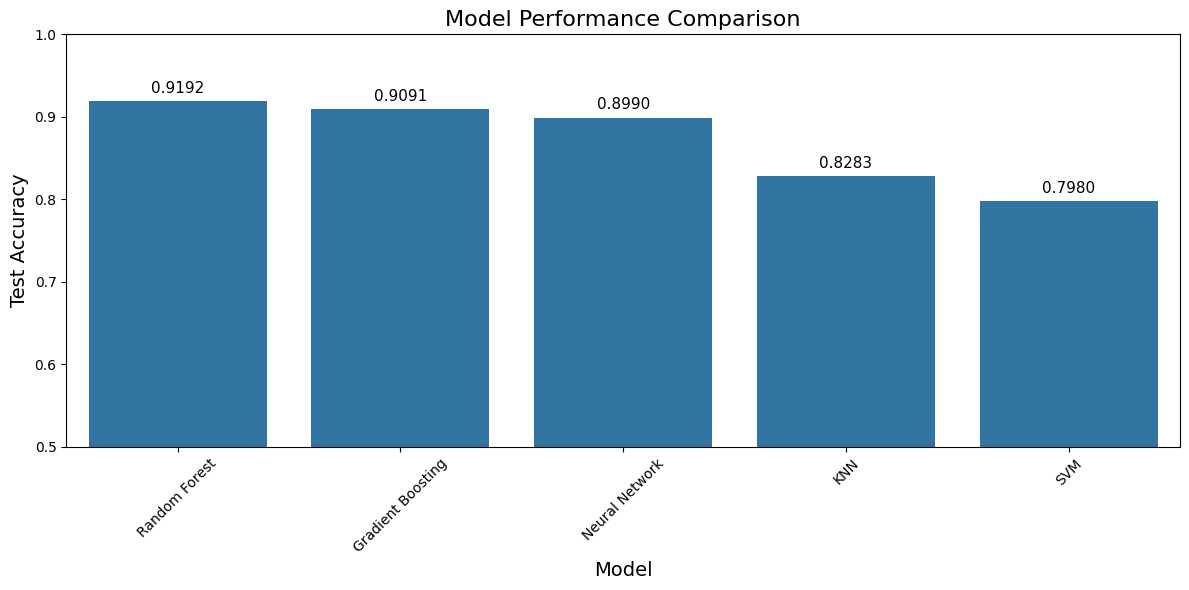


Best performing model: Random Forest with accuracy: 0.9192


In [14]:
# Compare all models and create model_comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'CV Accuracy': [results[m]['cv_accuracy'] for m in results.keys()],
    'CV Std': [results[m]['cv_std'] for m in results.keys()]
})

# Sorting models based on test accuracy
model_comparison = model_comparison.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

# Displaying actual model comparison
print("\nModel Performance Comparison:")
print(model_comparison)

# Visualize model comparison
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)

# Add accuracy values on top of bars
for i, acc in enumerate(model_comparison['Test Accuracy']):
    ax.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

best_model_name = model_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name} with accuracy: {model_comparison.iloc[0]['Test Accuracy']:.4f}")


Best performing model: Random Forest with accuracy: 0.9192

Tuning hyperparameters for the best model...


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9881

--- Tuned Random Forest ---
Test accuracy: 0.9192
Cross-validation accuracy: 0.9881 ± 0.0144

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.80      0.89         5
 Familial hemiplegic migraine       0.57      0.67      0.62         6
        Migraine without aura       0.94      1.00      0.97        15
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       0.67      0.67      0.67         3
   Typical aura with migraine       0.95      0.95      0.95        61
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.92        99
                    macro avg       0.88      0.83      0.85        99
                 weighted avg 

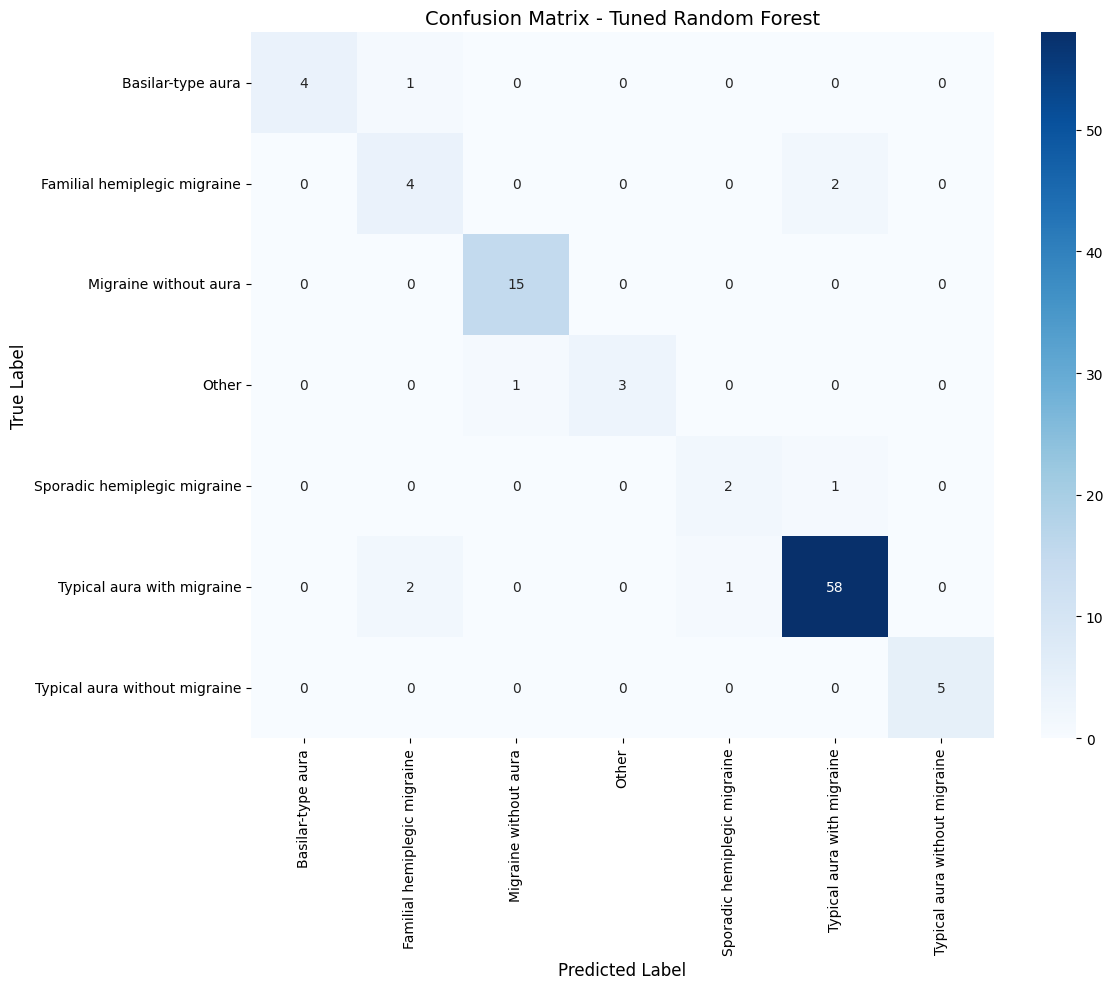

In [15]:
# Define GridSearchCV based on the best model type

best_model_name = model_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name} with accuracy: {model_comparison.iloc[0]['Test Accuracy']:.4f}")

print("\nTuning hyperparameters for the best model...")

if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42), 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }
    
    grid_search = GridSearchCV(
        SVC(random_state=42), 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
    
    grid_search = GridSearchCV(
        GradientBoostingClassifier(random_state=42), 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
elif best_model_name == "Neural Network":
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    
    grid_search = GridSearchCV(
        MLPClassifier(max_iter=1000, random_state=42), 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    
    grid_search = GridSearchCV(
        KNeighborsClassifier(), 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )

grid_search.fit(X_train_resampled, y_train_resampled)

# Setting the final model to the best model from grid search
final_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluation of  the tuned model
tuned_results = evaluate_model(final_model, X_train_resampled, y_train_resampled, 
                             X_test_scaled, y_test, f"Tuned {best_model_name}")

Multivairable analysis of migraine symptoms present in the data collection

In [16]:
def analyze_symptom_relationships(data, symptom1, symptom2):
    # creating contingency table
    contingency = pd.crosstab(data[symptom1], data[symptom2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Relationship between {symptom1} and {symptom2}:")
    print(f"Chi-square value:{chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Signficant relationship" if p < 0.05 else "No significant relationship")
    print("\nContingency Table:")
    print(contingency)
    print("\n")
    return {'chi2': chi2, 'p_value': p, 'contingency': contingency}
key_symptoms= ['Visual', 'Sensory', 'Nausea', 'Phonophobia', 'Photophobia', 'Vertigo']
results = {}
for i, symptom1 in enumerate(key_symptoms):
    for symptom2 in key_symptoms[i+1:]:
        results[(symptom1, symptom2)] = analyze_symptom_relationships(
            migraine_data_eng, symptom1, symptom2)

Relationship between Visual and Sensory:
Chi-square value:15.59
p-value: 0.0487
Degrees of freedom: 8
Signficant relationship

Contingency Table:
Sensory    0   1  2
Visual             
0         68  10  4
1         71  15  9
2        135  27  9
3         25   4  8
4          6   1  2


Relationship between Visual and Nausea:
Chi-square value:10.69
p-value: 0.0302
Degrees of freedom: 4
Signficant relationship

Contingency Table:
Nausea  0    1
Visual        
0       2   80
1       1   94
2       0  171
3       1   36
4       1    8


Relationship between Visual and Phonophobia:
Chi-square value:5.81
p-value: 0.2136
Degrees of freedom: 4
No significant relationship

Contingency Table:
Phonophobia  0    1
Visual             
0            2   80
1            5   90
2            2  169
3            0   37
4            0    9


Relationship between Visual and Photophobia:
Chi-square value:3.77
p-value: 0.4385
Degrees of freedom: 4
No significant relationship

Contingency Table:
Photophobia 

Enhanced feature engineering with related Medical Knowledge Fields

In [17]:
# 1. Adding disability score (MIDAS-inspired)
def calculate_disability_score(row):
    migraine_data_eng = row['Frequency'] * 3 + row['Intensity'] * 5 + row['Duration'] * 2
    return (row['Frequency'] *3) + (row['Intensity'] *5) + (row['Duration'] *2)
# applying the funciton to each row
migraine_data_eng['disability_score'] = migraine_data_eng.apply(calculate_disability_score, axis=1)
# checking results
print("Disability Score Summary:")
print(migraine_data_eng['disability_score'].describe())
print("\nAverage disability score by migraine type:")
print(migraine_data_eng.groupby('Type')['disability_score'].mean().sort_values(ascending=False))
# adding aura complexity
def calculate_aura_complexity(row):
    # base score from presence of visual, sensory, and speech symptoms
    base_score = (row['Visual']>0) + (row['Sensory']>0) +(row['Dysphasia']>0)
    intensity_factor = 1
    if row['Visual'] > 0:
        intensity_factor = max(intensity_factor, row['Visual'])
    if row['Sensory']> 0:
        intensity_factor = max(intensity_factor, row['Sensory'])
    return base_score * intensity_factor
# applying te function to create the actual feature
migraine_data_eng['aura_complexity'] = migraine_data_eng.apply(calculate_aura_complexity, axis=1)
print("\nAura Complexity Score Summary:")
print(migraine_data_eng['aura_complexity'].describe())
print("\nDistribution of aura complexity:")
print(migraine_data_eng['aura_complexity'].value_counts().sort_index())


Disability Score Summary:
count    394.000000
mean      22.695431
std        6.956325
min        5.000000
25%       18.000000
50%       22.000000
75%       27.000000
max       45.000000
Name: disability_score, dtype: float64

Average disability score by migraine type:
Type
Migraine without aura            31.500000
Other                            23.823529
Basilar-type aura                23.166667
Typical aura with migraine       21.804979
Familial hemiplegic migraine     20.666667
Sporadic hemiplegic migraine     18.642857
Typical aura without migraine    10.900000
Name: disability_score, dtype: float64

Aura Complexity Score Summary:
count    394.000000
mean       1.997462
std        1.534172
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        8.000000
Name: aura_complexity, dtype: float64

Distribution of aura complexity:
aura_complexity
0     65
1     80
2    153
3     25
4     53
6     15
8      3
Name: count, dtype: int64
